## Line Search

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [4]:
# function to find the initial bracket of the objective function 
# Have directly specified the simplified version of the function
def f(alpha,x,d):
  
  return (1-(x[0]-alpha*d[0]))**2 + 100*((x[1]-alpha*d[1])-(x[0]-alpha*d[0])**2)**2
 
# derivative of the objective function 

def grad_alpha(f,alpha,x,d):
  h = 0.00001
  return (f(alpha+h,x,d)-f(alpha,x,d))/h

def bracket_minimum(alpha,x,d,s,k):

  a, fa = alpha,  f(alpha,x,d)
  b, fb = a+s , f(a+s,x,d)

  if fb > fa:
    a,b = b,a 
    fa, fb = fb,fb
    s = -s

  while True:
    c, fc = b+s, f(b+s,x,d)
    if fc > fb:
      if a < c:
        return [a,c]
      else:
        return [c,a]
    a,fa,b,fb = b,fb,c,fc
    s*=k

def bisection_root_finding(a,b,x,d,eps):

  if a > b : 
    a,b = b,a 
  fa, fb = grad_alpha(f,a,x,d), grad_alpha(f,b,x,d)
  if fa == 0:
    b = a
    return (a)

  if fb == 0:
    a = b
    return (b)
  iter = 0
 
  while abs(b - a) > eps:
    iter +=1
    c = (a+b)/2
    y = grad_alpha(f,c,x,d)

    if y == 0:
      a,b = c, c
      break

    if np.sign(y)  < 0  :
      a = c
    else:
      b = c

  return (a+b)/2

def line_search(alpha,x,d):
  
  a,b = bracket_minimum(alpha,x,d,s=0.01,k=2.0)
  alpha = bisection_root_finding(a,b,x,d,eps=1e-5)
  return alpha

# Momentum
Gradient descent will take a long time to traverse nearly a flat surface. Allowing momentum to accumulate is one way to speed progress. We can modify gradient descent to incorporate momentum.
The momentum update equations are :

$v^{(k+1)} = \beta v^{(k)} - \alpha g^{(k)}$\
$ x^{(k+1)} = x^{(k)} + v^{(k+1)}$

for $\beta = 0$ we recover gradient descent.Momentum can be interpreted as a ball rolling down a nearly horizontal incline. The ball naturally gathers momentum as gravity causes it to accelerate, just as gradient causes momentum to accumulate in this descent method.


In [5]:
# Rosenbrock's Banana Function
def fun(x,a):
  pow = a
  if pow == 0:
    return (1 - x[0])**2 + 100*(x[1] - x[0]**2)**2
   
  else:
    h = 0.00001
    x1 = np.array([x[0]+h,x[1]])
    x2 = np.array([x[0],x[1]+h])
    # The gradient Vector
    g = np.array([(fun(x1,0)-fun(x,0))/h,(fun(x2,0)-fun(x,0))/h])
    return g

In [6]:
''' alpha : Learning rate
    beta  : Momentum Decay
       v  : Momentum'''
def momentum(x_init,alpha,beta,eps):
  
  iter = 0
  v = np.ones(len(x_init))
  arr = []
  x, f ,g = x_init,fun(x_init,0),fun(x_init,1)
  arr.append(x) 
  d = np.array(g/np.linalg.norm(g))
  if (np.linalg.norm(g)==0):
    print(" The min value of the function is:",f, "for value  of x:",x)
    return x
  else:
    while abs(f) > eps:

      iter+=1
      alpha = line_search(alpha,x,d)
      v = beta*v + alpha*d
      x = x - v
      arr.append(x) 
      f, g = fun(x,0) , fun(x,1)
      d = np.array(g/np.linalg.norm(g))
    print("f:",f )
    
    return (x,arr)

In [7]:
x = np.array([1,2])
alpha = 4
beta = 0.9
eps = 1e-5
x,arr = momentum(x,alpha,beta,eps)
print("The minimum point of the Rosenbrock function:",x)

f: 9.201627319470627e-06
The minimum point of the Rosenbrock function: [0.99729373 0.99473181]


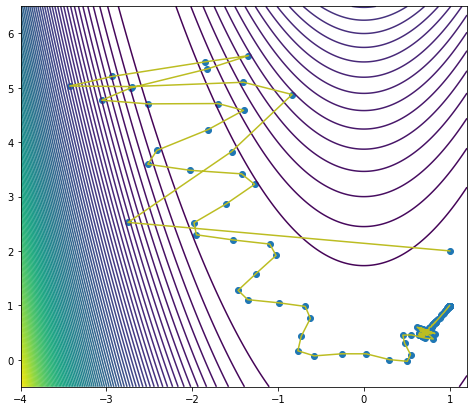

In [8]:
# Plot of the successive points of 'x' as we progress in the direction of the steepest descent.

x1 = np.linspace(-4,1.2,500)
x2 = np.linspace(-0.5,6.5,500)
arr = pd.DataFrame(arr)
# Creating 2-D grid of features
[X, Y] = np.meshgrid(x1,x2)
Z = (1 - X)**2 + 100*(Y - X**2)**2

a,b  = arr[0],arr[1]
plt.figure(figsize=(8,7))
plt.scatter(a,b)
plt.contour(X,Y,Z,90)
plt.plot(a,b,color='#bcbd22')
plt.show()

# Nesterov Momentum
Nesterov Momentum modifies the momentum algorithm to use the gradient at the projected future position.
$v^{(k+1)} = \beta v^{(k)} - \alpha \nabla f(x^{(k)} + \beta v^{(k+1)})$\
$ x^{(k+1)} = x^{(k)} + v^{(k+1)}$

In [9]:
''' alpha : Learning rate
    beta  : Momentum Decay
       v  : Momentum'''
def nesterov_momentum(x_init,alpha,beta,eps): 
  iter = 0
  v = np.ones(len(x_init))
  arr = []
  x, f ,g = x_init,fun(x_init,0),fun(x_init,1)
  arr.append(x) 
  d = np.array(g/np.linalg.norm(g))
  if (np.linalg.norm(g)==0):
    print(" The min value of the function is:",f, "for value  of x:",x)
    return x
  else:
    while abs(f) > eps:

      iter+=1
      alpha = line_search(alpha,x,d)
      val = x + beta*v 
      q = fun(val,1)
      #q = np.array(q/np.linalg.norm(q))
      v = beta*v - alpha*(q/np.linalg.norm(q))
      x = x + v
      arr.append(x) 
      f, g = fun(x,0) , fun(x,1)
      d = np.array(g/np.linalg.norm(g))
    print("f:",f )
    
    return (x,arr)

In [10]:
x = np.array([1,2])
alpha = 4
beta = 0.9
eps = 1e-5
x,arr = nesterov_momentum(x,alpha,beta,eps)
print("The minimum point of the Rosenbrock function:",x)

f: 9.73713450241142e-06
The minimum point of the Rosenbrock function: [0.99708856 0.99407331]


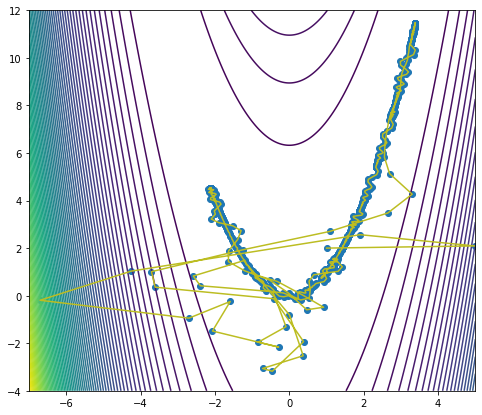

In [11]:
# Plot of the successive points of 'x' as we progress in the direction of the steepest descent.

x1 = np.linspace(-7,5,500)
x2 = np.linspace(-4,12,500)
arr = pd.DataFrame(arr)
# Creating 2-D grid of features
[X, Y] = np.meshgrid(x1,x2)
Z = (1 - X)**2 + 100*(Y - X**2)**2

a,b  = arr[0],arr[1]
plt.figure(figsize=(8,7))
plt.scatter(a,b)
plt.contour(X,Y,Z,90)
plt.plot(a,b,color='#bcbd22')
plt.show()